In [1]:
import torch

import torch.nn as nn

from torchvision import transforms
from torch.utils.data import DataLoader
import torch.optim as optim

from train_functions import get_data, train_model, check
from utils import plot_loss
from custom_loss import CustomLoss

from ResNet_UNet import ResNet_UNet

In [2]:
H, W = 128, 128
BATCH_SIZE = 64
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"


train_transf = transforms.Compose([transforms.RandomRotation(degrees=5),
    transforms.RandomCrop(480), 
    transforms.ColorJitter(brightness = [0.8,1.2]),
    transforms.Resize((H, W)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()]
)

test_transf = transforms.Compose([transforms.Resize((H, W)),
                             transforms.ToTensor()])

train_dataset, test_dataset = get_data(reduced=True, train_transformation=train_transf, test_transformation=test_transf)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)


print("The device is: ", DEVICE)
print("Number of train images: ", len(train_dataset))
print("Number of test images: ", len(test_dataset))
print("Image shape:", train_dataset[0][0].shape)
print("Mask shape:", train_dataset[0][1].shape)

The device is:  cuda
Number of train images:  1111
Number of test images:  338
Image shape: torch.Size([3, 128, 128])
Mask shape: torch.Size([1, 128, 128])


In [10]:
model = ResNet_UNet()

criterion = nn.L1Loss()
scores = [criterion, nn.MSELoss()]
optimizer = optim.Adam(model.parameters())

num_epochs = 50

In [7]:
# model.to(DEVICE)

# checkpoint = torch.load('./checkpoints/ResNet_UNet/epoch_0.pth', map_location=torch.device('cuda'))

# model.load_state_dict(checkpoint['model_state_dict'])
# optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
# train_loss = checkpoint['train_loss']
# test_loss = checkpoint['test_loss']
# optimizer.param_groups[0]['capturable'] = True

# del checkpoint

In [11]:
trained_model, predictions, train_loss, test_loss = train_model(model, train_loader, 
                                                               test_loader, num_epochs, DEVICE, criterion, scores, optimizer, 
                                                               start_epoch=0)#2, train_loss=train_loss, test_loss=test_loss)

Batch [1/18], Loss: 0.4455
Batch [2/18], Loss: 0.8377
Batch [3/18], Loss: 0.3357
Batch [4/18], Loss: 0.2693
Batch [5/18], Loss: 0.1938
Batch [6/18], Loss: 0.1914
Batch [7/18], Loss: 0.1573
Batch [8/18], Loss: 0.1623
Batch [9/18], Loss: 0.1535
Batch [10/18], Loss: 0.1440
Batch [11/18], Loss: 0.1637
Batch [12/18], Loss: 0.1382
Batch [13/18], Loss: 0.1262
Batch [14/18], Loss: 0.1397
Batch [15/18], Loss: 0.1405
Batch [16/18], Loss: 0.1167
Batch [17/18], Loss: 0.1316
Batch [18/18], Loss: 0.1090
Epoch [1/50], Train Loss: 0.2198
Test Loss: L1Loss(): 0.2535; MSELoss(): 0.0924
Batch [1/18], Loss: 0.1274
Batch [2/18], Loss: 0.1119
Batch [3/18], Loss: 0.1202
Batch [4/18], Loss: 0.1107
Batch [5/18], Loss: 0.1150
Batch [6/18], Loss: 0.1126
Batch [7/18], Loss: 0.1117
Batch [8/18], Loss: 0.1137
Batch [9/18], Loss: 0.1125
Batch [10/18], Loss: 0.1428
Batch [11/18], Loss: 0.1304
Batch [12/18], Loss: 0.1196
Batch [13/18], Loss: 0.1257
Batch [14/18], Loss: 0.1117
Batch [15/18], Loss: 0.1048
Batch [16/18],

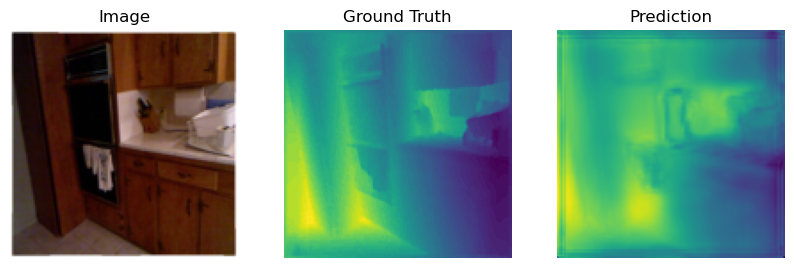

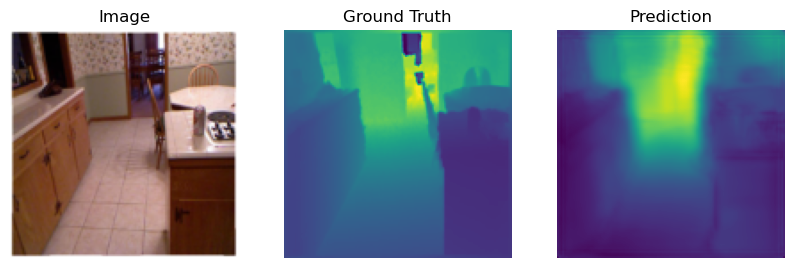

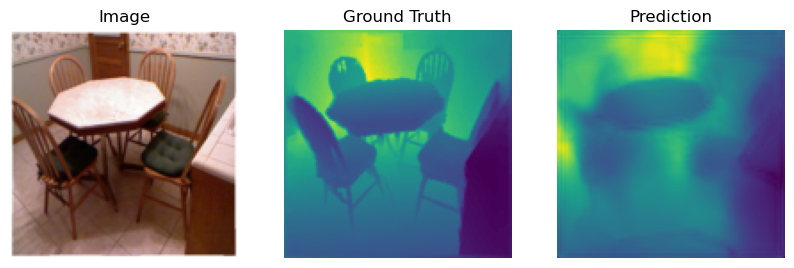

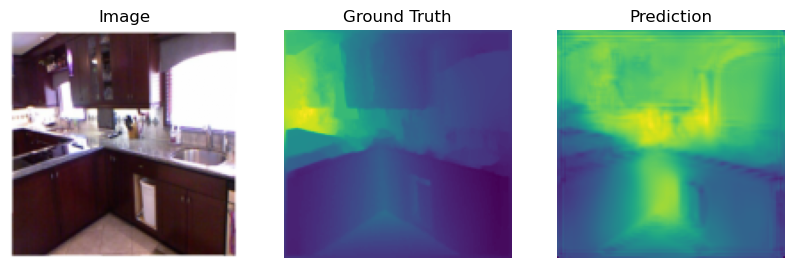

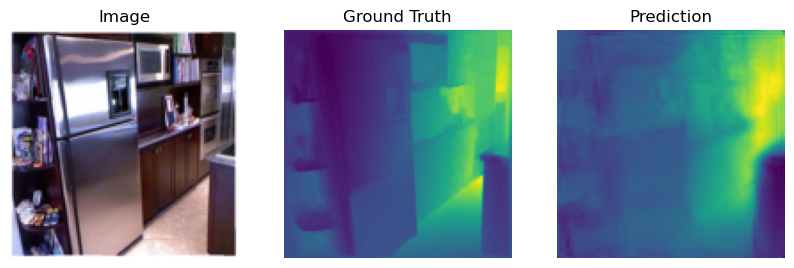

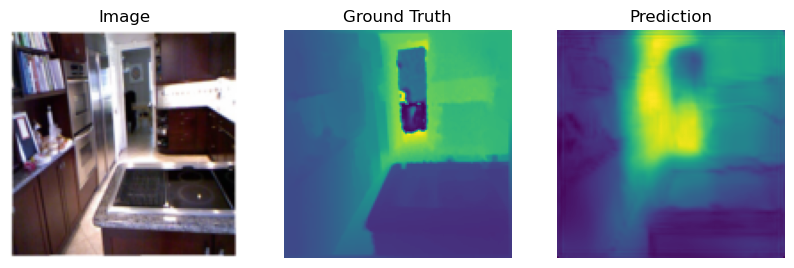

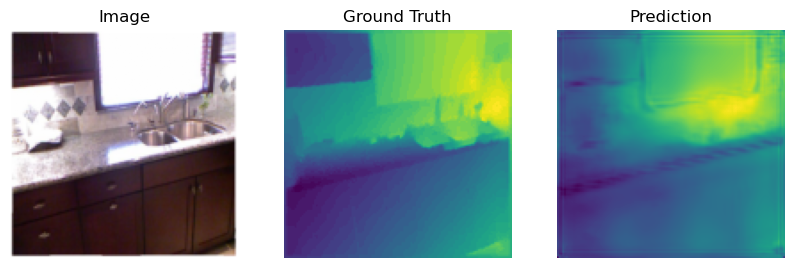

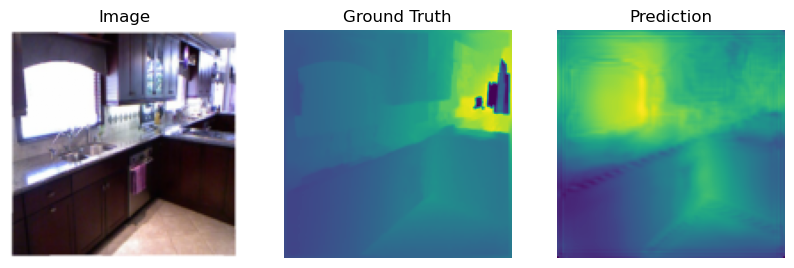

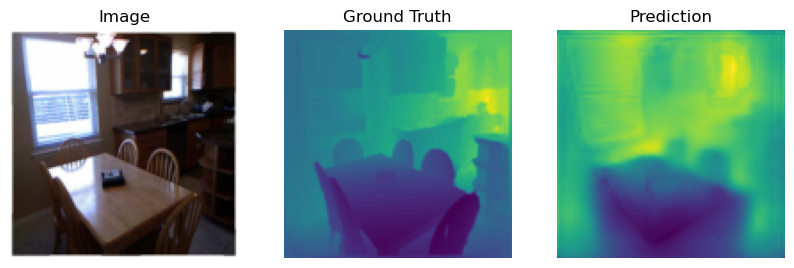

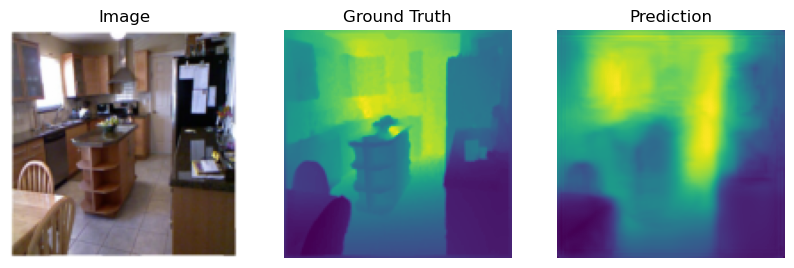

In [12]:
for i in range(10):
    image, mask  = test_dataset[i][0], test_dataset[i][1]
    prediction = predictions[i]
    check(image, mask, prediction)

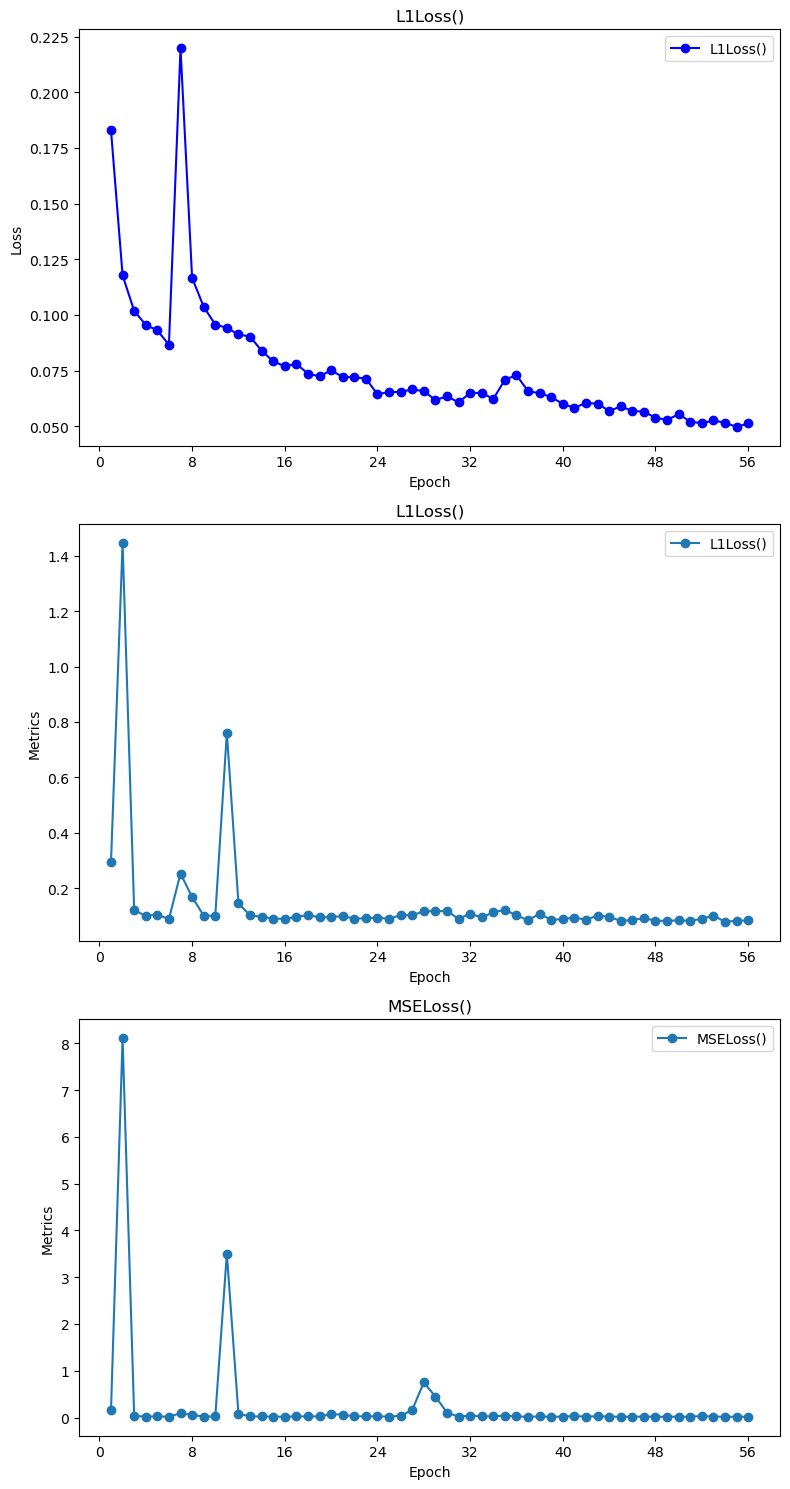

In [13]:
plot_loss(train_loss, test_loss, scores)

In [14]:
model = ResNet_UNet()

criterion = CustomLoss('Custom2')
scores = [criterion, nn.L1Loss(), nn.MSELoss()]
optimizer = optim.Adam(model.parameters())

num_epochs = 49

In [15]:
# model.to(DEVICE)

# checkpoint = torch.load('./checkpoints/ResNet_UNet/epoch_0.pth', map_location=torch.device('cuda'))

# model.load_state_dict(checkpoint['model_state_dict'])
# optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
# train_loss = checkpoint['train_loss']
# test_loss = checkpoint['test_loss']
# optimizer.param_groups[0]['capturable'] = True

# del checkpoint

In [16]:
trained_model, predictions, train_loss, test_loss = train_model(model, train_loader, 
                                                               test_loader, num_epochs, DEVICE, criterion, scores, optimizer, 
                                                               start_epoch=0)#2, train_loss=train_loss, test_loss=test_loss)

Batch [1/18], Loss: 0.5767
Batch [2/18], Loss: 0.6547
Batch [3/18], Loss: 0.2582
Batch [4/18], Loss: 0.2221
Batch [5/18], Loss: 0.1699
Batch [6/18], Loss: 0.1951
Batch [7/18], Loss: 0.1485
Batch [8/18], Loss: 0.1675
Batch [9/18], Loss: 0.1553
Batch [10/18], Loss: 0.1421
Batch [11/18], Loss: 0.1557
Batch [12/18], Loss: 0.1784
Batch [13/18], Loss: 0.1418
Batch [14/18], Loss: 0.1626
Batch [15/18], Loss: 0.1520
Batch [16/18], Loss: 0.1508
Batch [17/18], Loss: 0.1406
Batch [18/18], Loss: 0.1531
Epoch [1/49], Train Loss: 0.2181
Test Loss: CustomLoss(): 0.2488; L1Loss(): 0.2214; MSELoss(): 0.1046
Batch [1/18], Loss: 0.1779
Batch [2/18], Loss: 0.1435
Batch [3/18], Loss: 0.1474
Batch [4/18], Loss: 0.1400
Batch [5/18], Loss: 0.1330
Batch [6/18], Loss: 0.1449
Batch [7/18], Loss: 0.1151
Batch [8/18], Loss: 0.1452
Batch [9/18], Loss: 0.1374
Batch [10/18], Loss: 0.1369
Batch [11/18], Loss: 0.1472
Batch [12/18], Loss: 0.1323
Batch [13/18], Loss: 0.1409
Batch [14/18], Loss: 0.1412
Batch [15/18], Loss:

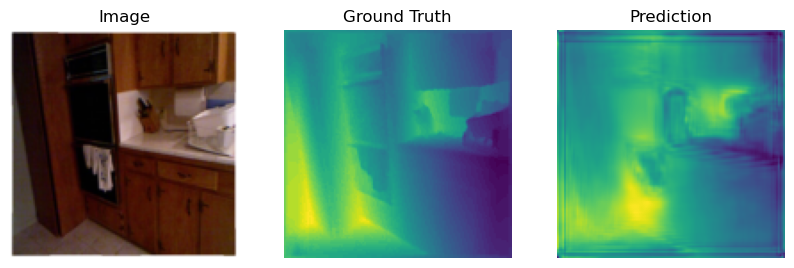

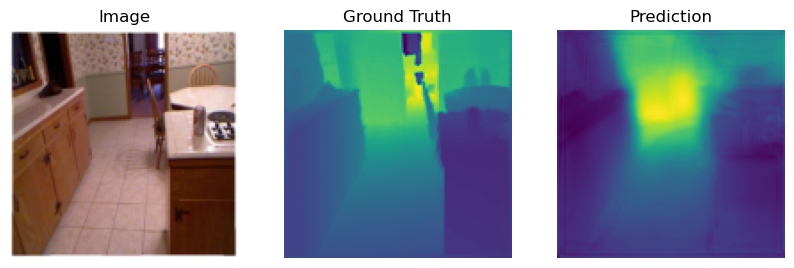

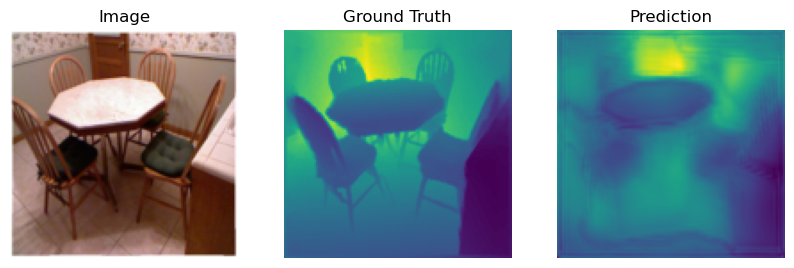

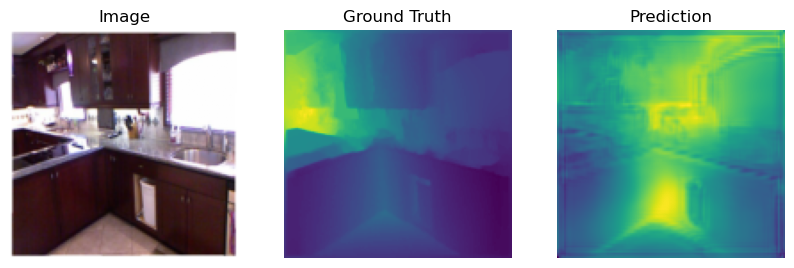

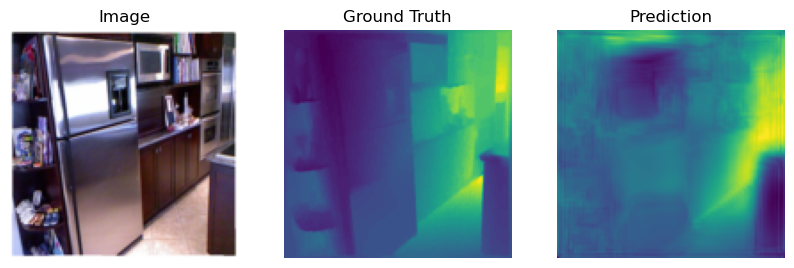

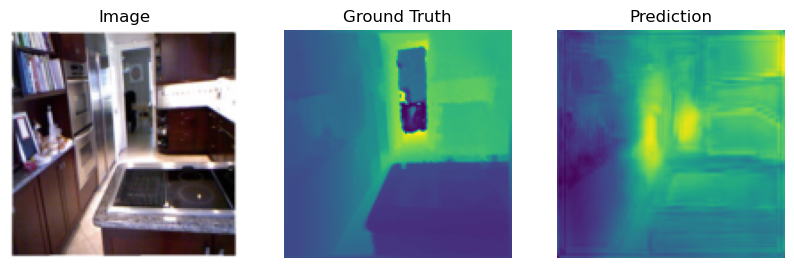

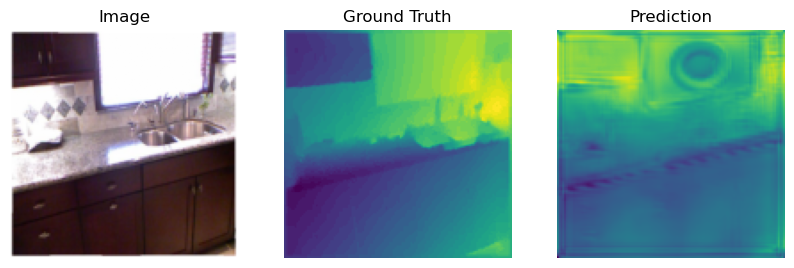

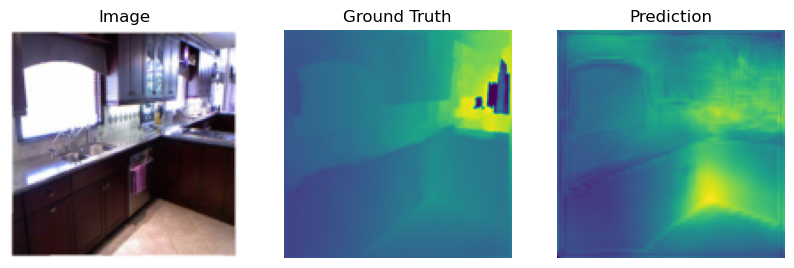

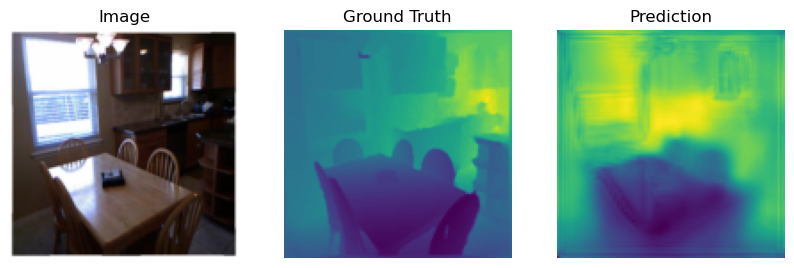

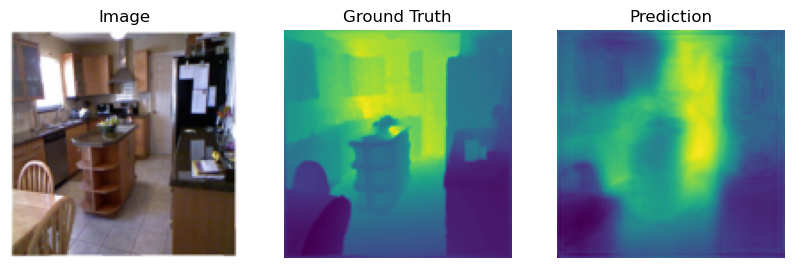

In [17]:
for i in range(10):
    image, mask  = test_dataset[i][0], test_dataset[i][1]
    prediction = predictions[i]
    check(image, mask, prediction)

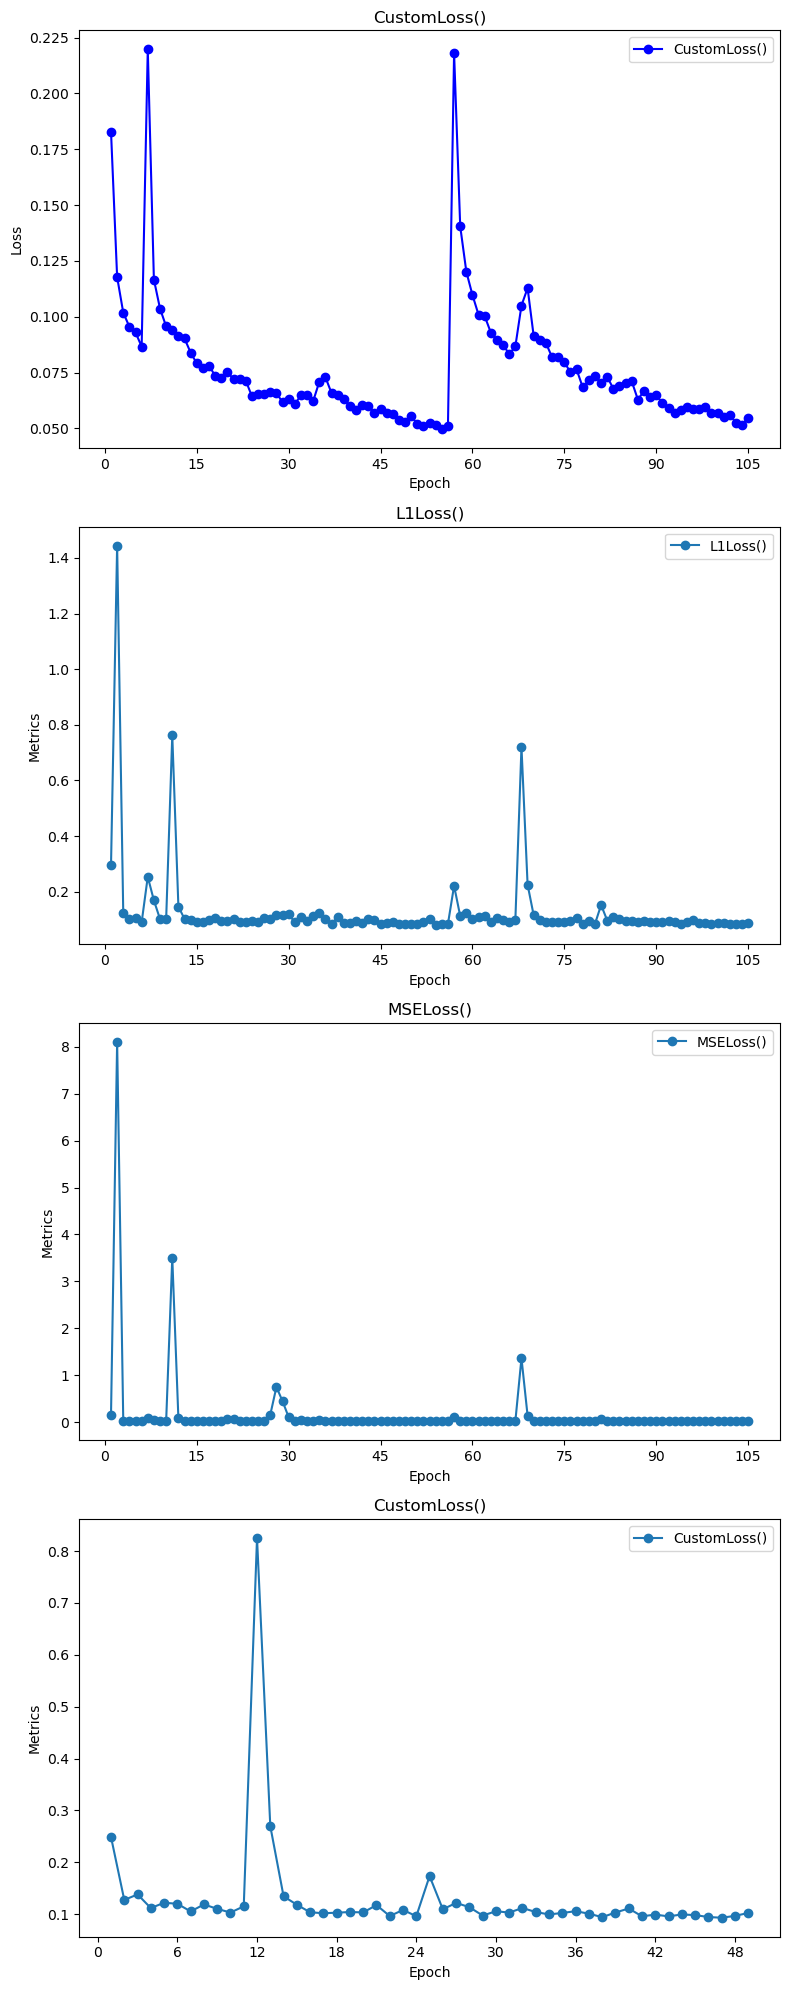

In [18]:
plot_loss(train_loss, test_loss, scores)

In [3]:
model = ResNet_UNet()

criterion = CustomLoss('Custom3')
scores = [criterion, nn.L1Loss(), nn.MSELoss()]
optimizer = optim.Adam(model.parameters())

num_epochs = 50

In [4]:
model.to(DEVICE)

checkpoint = torch.load('./checkpoints/ResNet_UNet/epoch_30.pth', map_location=torch.device('cuda'))

model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
train_loss = checkpoint['train_loss']
test_loss = checkpoint['test_loss']
optimizer.param_groups[0]['capturable'] = True

del checkpoint

In [5]:
trained_model, predictions, train_loss, test_loss = train_model(model, train_loader, 
                                                               test_loader, num_epochs, DEVICE, criterion, scores, optimizer, 
                                                               start_epoch=30, train_loss=train_loss, test_loss=test_loss)

Batch [1/18], Loss: 0.0990
Batch [2/18], Loss: 0.1177
Batch [3/18], Loss: 0.0963
Batch [4/18], Loss: 0.0991
Batch [5/18], Loss: 0.0903
Batch [6/18], Loss: 0.1166
Batch [7/18], Loss: 0.1033
Batch [8/18], Loss: 0.1092
Batch [9/18], Loss: 0.1420
Batch [10/18], Loss: 0.1155
Batch [11/18], Loss: 0.0975
Batch [12/18], Loss: 0.1217
Batch [13/18], Loss: 0.1001
Batch [14/18], Loss: 0.0897
Batch [15/18], Loss: 0.0834
Batch [16/18], Loss: 0.1182
Batch [17/18], Loss: 0.1005
Batch [18/18], Loss: 0.1471
Epoch [31/50], Train Loss: 0.1082
Test Loss: CustomLoss(): 0.1522; L1Loss(): 0.0922; MSELoss(): 0.0560
Batch [1/18], Loss: 0.1144
Batch [2/18], Loss: 0.1038
Batch [3/18], Loss: 0.0989
Batch [4/18], Loss: 0.1119
Batch [5/18], Loss: 0.1166
Batch [6/18], Loss: 0.1015
Batch [7/18], Loss: 0.1045
Batch [8/18], Loss: 0.1032
Batch [9/18], Loss: 0.1284
Batch [10/18], Loss: 0.1025
Batch [11/18], Loss: 0.1165
Batch [12/18], Loss: 0.0931
Batch [13/18], Loss: 0.0971
Batch [14/18], Loss: 0.0948
Batch [15/18], Loss

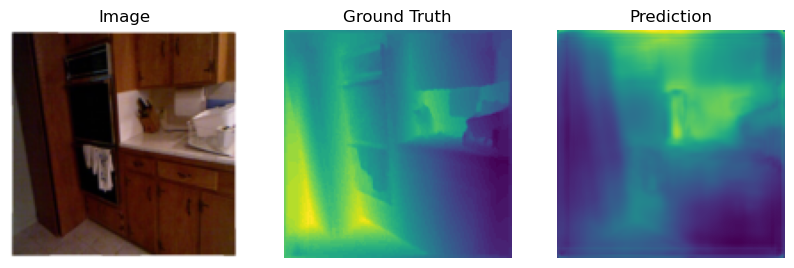

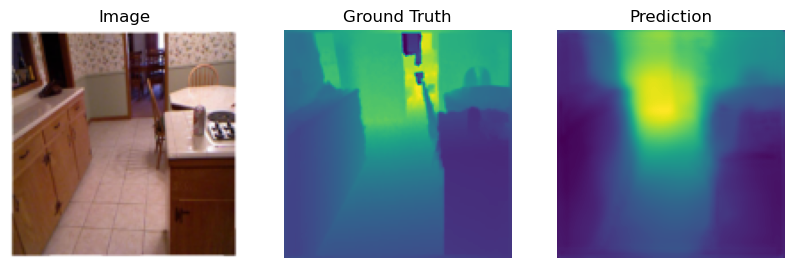

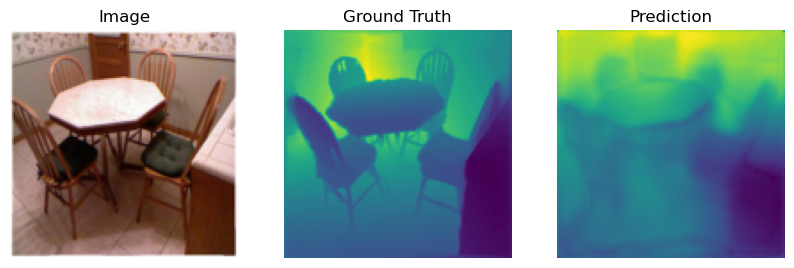

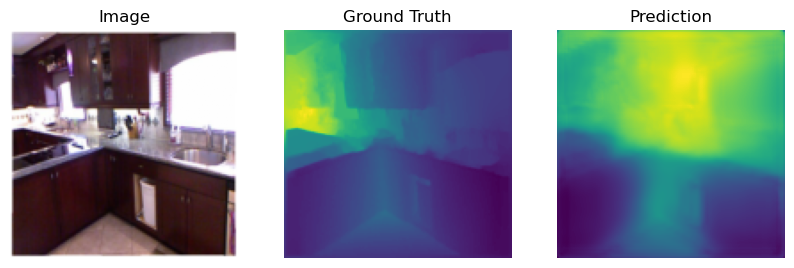

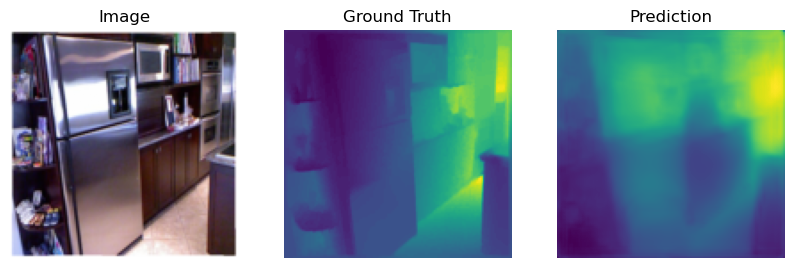

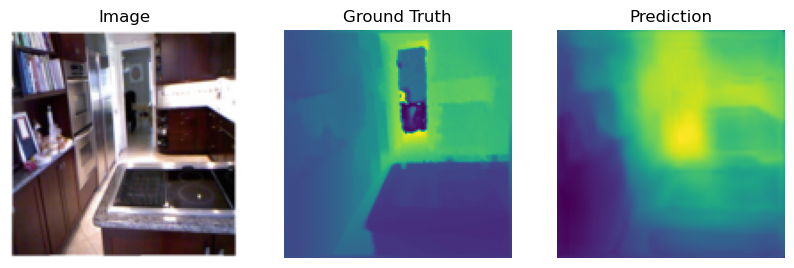

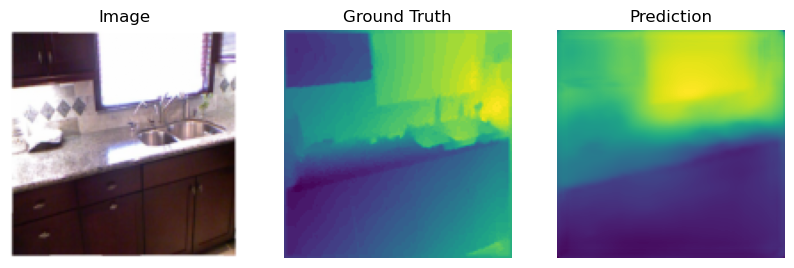

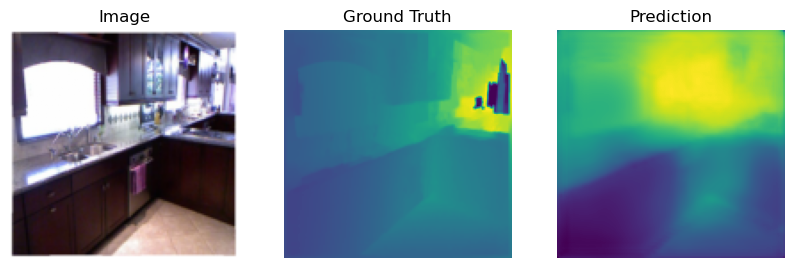

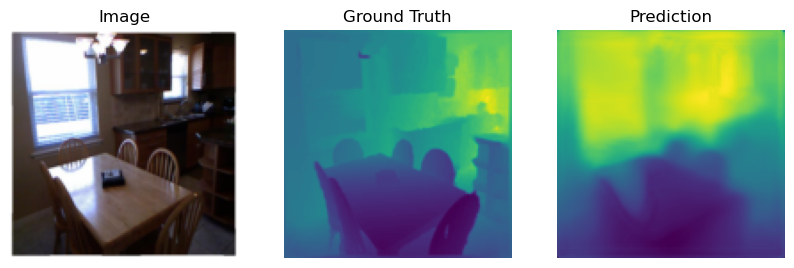

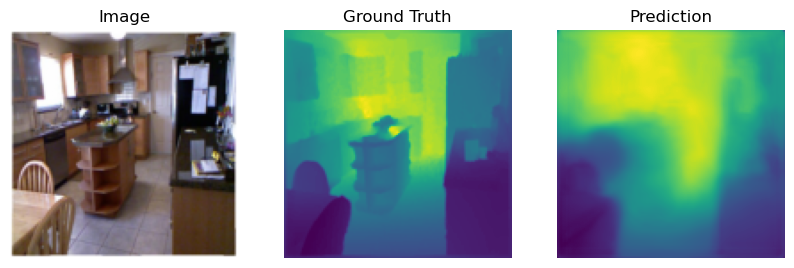

In [6]:
for i in range(10):
    image, mask  = test_dataset[i][0], test_dataset[i][1]
    prediction = predictions[i]
    check(image, mask, prediction)

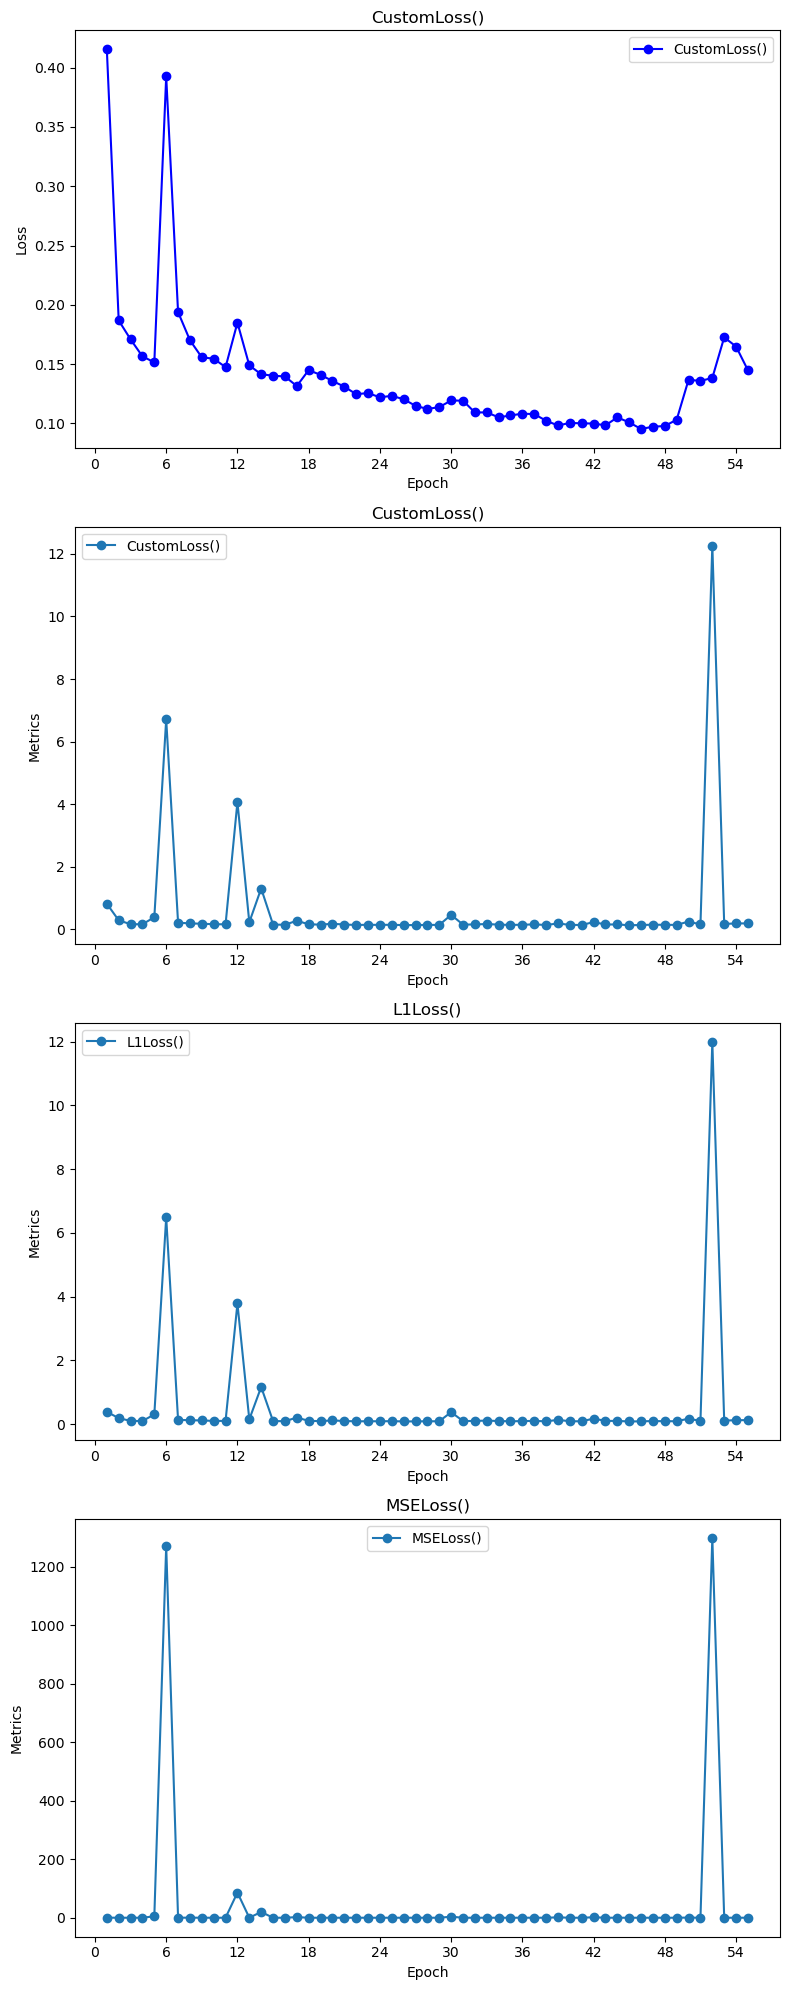

In [7]:
plot_loss(train_loss, test_loss, scores)